In [1]:
# load libraries
from pylab import *
import nylib, amlib
import pandas as pd
import numpy as np
import scipy


## Load data

In [2]:
dataPath = './37C_multipower_data'
field500 = float(nylib.BrukerPar('%s/12'%dataPath, 'acqp','SFO1') )

## Generate WASSR Map

(61, 1, 1, 64, 64)


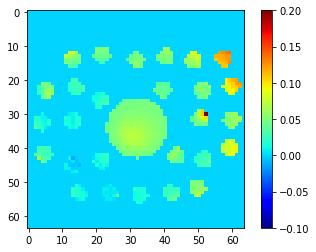

In [3]:
tubeMask, wassr_map = amlib.wassrProcessing('%s/%d'%(dataPath, 12), maskthreshold=200)
imshow(wassr_map)
colorbar()
jet()
clim(-0.1, 0.2)

## Load multi-B1 data and correct for B0 using WASSR Map

In [4]:
expNumbers = r_[12, 10, 13, 14, 15, 22, 16, 17]

cestData, cestFreq = amlib.loadMultiData(dataPath, expNumbers[1:-1])
cestData_corrected = amlib.correctedData(cestFreq, cestData, tubeMask==0, wassr_map)

(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)
(131, 1, 1, 64, 64)


In [ ]:
# Normalize data
lor_map = zeros((9, cestData_corrected.shape[0], cestData_corrected.shape[-2], cestData_corrected.shape[-1]))
for ik in range(cestData_corrected.shape[0]):
    for ii in range(cestData_corrected.shape[-2]):
        for ij in range(cestData_corrected.shape[-1]):
            if tubeMask[ii,  ij]!=0:
                continue
            lor_map[:, ik, ii, ij] = amlib.cestFit_2(cestFreq, scipy.ndimage.median_filter(cestData_corrected[ik, :, ii, ij], size=5))


### Generate masks for plotting

In [ ]:
import scipy

test = (lor_map[5, 5] > 0.004)
test2 = scipy.ndimage.median_filter( test, size=3)

figure(figsize=(6,6))
imshow(test2)

In [ ]:
# Obtain frequency distribution of the peak
masked_array = ma.array(lor_map[6,5], mask=logical_not(test2))
figure(2)
clf()
imshow(cestData[0,0], cmap='gray')
imshow(masked_array, cmap='jet', interpolation='nearest')
ax = gcf().add_axes([0.85, 0.2, 0.04, 0.6])
cb = colorbar(cax=ax, orientation='vertical')
# clim(0., 20.)
# cb.set_ticks([0., 4. ,8. ,12., 16., 20.])
# cb.set_label('$\mathrm{MTR_{asym} \/(\%)}$', fontsize=18)
figure(2).canvas.draw()

### 7.2 uT

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import masked_array

v1 = lor_map[6,5]
v1a = masked_array(lor_map[5,5],v1<5.4)
v1b = masked_array(lor_map[5,5],v1>=5.4)

masked_array_a = ma.array(v1a, mask=logical_not(test2))
masked_array_b = ma.array(v1b, mask=logical_not(test2))


# create custom colour maps
from matplotlib.colors import LinearSegmentedColormap
cmap_5MDHT = LinearSegmentedColormap.from_list('cmap_5MDHT', ['black', '#F20061'])
cmap_pdC = LinearSegmentedColormap.from_list('cmap_pdC', ['black', '#28CD41'])

cmap_null= LinearSegmentedColormap.from_list('cmap_null', ['black', 'black'])


fig,ax = plt.subplots()
ax.imshow(cestData[0,0], cmap=cmap_null)

pa_pdC = ax.imshow(masked_array_a,interpolation='nearest',vmin=0, vmax=0.1, cmap=cmap_pdC)
cb_pdC = plt.colorbar(pa_pdC,shrink=1.0)

pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',vmin=0, vmax=0.1 ,cmap=cmap_5MDHT)
cb_5MDHT = plt.colorbar(pa_5MDHT,shrink=1.0)

cb_pdC.set_label('pdC')
cb_5MDHT.set_label('5-MDHT')
# fig.savefig('map_7pt2uT.eps', dpi=300)

In [ ]:
v1a = masked_array(lor_map[6,5],v1<5.4)
v1b = masked_array(lor_map[6,5],v1>=5.4)

masked_array_a = ma.array(v1a, mask=logical_not(test2))
masked_array_b = ma.array(v1b, mask=logical_not(test2))


# create custom colour maps
from matplotlib.colors import LinearSegmentedColormap
cmap_5MDHT = LinearSegmentedColormap.from_list('cmap_5MDHT', ['black', '#F20061'])
cmap_pdC = LinearSegmentedColormap.from_list('cmap_pdC', ['black', '#28CD41'])

cmap_null= LinearSegmentedColormap.from_list('cmap_null', ['black', 'black'])


fig,ax = plt.subplots()
ax.imshow(cestData[0,0], cmap=cmap_null)

# pa_pdC = ax.imshow(masked_array_a,interpolation='nearest',vmin=5.6, vmax=6.0, cmap=cmap_pdC)
pa_pdC = ax.imshow(masked_array_a,interpolation='nearest', cmap=cmap_pdC)
cb_pdC = plt.colorbar(pa_pdC,shrink=1.0)

# pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',vmin=4.7, vmax=5.2,cmap=cmap_5MDHT)
pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',cmap=cmap_5MDHT)
cb_5MDHT = plt.colorbar(pa_5MDHT,shrink=1.0)

cb_pdC.set_label('pdC')
cb_5MDHT.set_label('5-MDHT')
# fig.savefig('freq_map_7pt2uT.eps', dpi=300)

In [ ]:
v1a = masked_array(lor_map[6,2],v1<5.4)
v1b = masked_array(lor_map[6,2],v1>=5.4)

masked_array_a = ma.array(v1a, mask=logical_not(test2))
masked_array_b = ma.array(v1b, mask=logical_not(test2))


# create custom colour maps
from matplotlib.colors import LinearSegmentedColormap
cmap_5MDHT = LinearSegmentedColormap.from_list('cmap_5MDHT', ['black', '#F20061'])
cmap_pdC = LinearSegmentedColormap.from_list('cmap_pdC', ['black', '#28CD41'])

cmap_null= LinearSegmentedColormap.from_list('cmap_null', ['black', 'black'])


fig,ax = plt.subplots()
ax.imshow(cestData[0,0], cmap=cmap_null)

pa_pdC = ax.imshow(masked_array_a,interpolation='nearest',vmin=5.3, vmax=6.0, cmap=cmap_pdC)
# pa_pdC = ax.imshow(masked_array_a,interpolation='nearest', cmap=cmap_pdC)
cb_pdC = plt.colorbar(pa_pdC,shrink=1.0)

pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',vmin=4.5, vmax=5.2,cmap=cmap_5MDHT)
# pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',cmap=cmap_5MDHT)
cb_5MDHT = plt.colorbar(pa_5MDHT,shrink=1.0)

cb_pdC.set_label('pdC')
cb_5MDHT.set_label('5-MDHT')
# fig.savefig('freq_map_3pt6uT.eps', dpi=300)

## Plot other maps

In [ ]:
labels = ['1pt2uT', '2pt4uT', '3pt6uT', '4pt8uT', '5pt9uT', '7pt2uT']

for ii in range(len(labels)):
    v1a = masked_array(lor_map[5,ii],v1<5.4)
    v1b = masked_array(lor_map[5,ii],v1>=5.4)
    
    masked_array_a = ma.array(v1a, mask=logical_not(test2))
    masked_array_b = ma.array(v1b, mask=logical_not(test2))
    
    fig,ax = plt.subplots()
    ax.imshow(cestData[0,0], cmap=cmap_null)

    pa_pdC = ax.imshow(masked_array_a,interpolation='nearest',vmin=0, vmax=0.1, cmap=cmap_pdC)
    cb_pdC = plt.colorbar(pa_pdC,shrink=1.0)

    pa_5MDHT = ax.imshow(masked_array_b,interpolation='nearest',vmin=0, vmax=0.1 ,cmap=cmap_5MDHT)
    cb_5MDHT = plt.colorbar(pa_5MDHT,shrink=1.0)

    cb_pdC.set_label('pdC')
    cb_5MDHT.set_label('5-MDHT')
#     fig.savefig('map_%s.eps'%labels[ii], dpi=300)

## Read roi data from excel and show sample Lorentzian fits

In [ ]:
xl = pd.ExcelFile("%s/Multipower data for CEST spectral editing.xlsx"%dataPath)
# xl.sheet_names
names = xl.sheet_names
print(names)

In [ ]:
df = xl.parse("1.2uT", skiprows=0)
test = transpose(df.values)
cestFreq = test[0]

In [ ]:
data = zeros((2, 4, 6, 101))
data_asym = zeros((2, 4, 6, 50))
for ii in range(data.shape[2]):
    df_temp = xl.parse("%s"%names[ii], skiprows=0)
    data_temp = transpose(df_temp.values)
    for ij in range(data.shape[1]):
        data[0, ij, ii] = data_temp[2+ij*2]
        data_asym[0, ij, ii] = (amlib.asymAnalysis(data[0, ij, ii], cestFreq))[1]
        data[1, ij, ii] = data_temp[3+ij*2]
        data_asym[1, ij, ii] = (amlib.asymAnalysis(data[1, ij, ii], cestFreq))[1]
asym_ints = (amlib.asymAnalysis(data[0, 0, 0], cestFreq))[0]

#### Raw data

In [ ]:
from matplotlib import gridspec
figure(11, figsize=(8, 12))
gs1 = gridspec.GridSpec(4, 2)
gs1.update(left=0.1, right=0.98, bottom = 0.1, top = 0.92, wspace=0.1, hspace = 0.1)

for ii in range(data.shape[0]):
    for ij in range(data.shape[1]):
        axNum = subplot(gs1[ij, ii])
        for ik in range(data.shape[2]):
            plot(cestFreq, data[ii,ij,ik])
            plot(cestFreq[asym_ints], data_asym[ii,ij,ik])
        xlim(8., -8)
        ylim(0., 1.)
        grid('on')
            

#### Sample fits

In [ ]:
# shape (number of compounds, number of concentrations, number of powers, number of parameters from each fit)
lor_rois = zeros((data.shape[0], data.shape[1], data.shape[2], 9))

for ii in range(lor_rois.shape[0]):
    for ij in range(lor_rois.shape[1]):
        for ik in range(lor_rois.shape[2]):
            lor_rois[ii, ij, ik] = amlib.cestFit_2(cestFreq, data[ii, ij, ik])

In [ ]:
def plotFit(ax, freq, data, fitParameters):
    fitinds = np.where( (freq > 3.) * (freq < 8.) )[0]
    plotFreq = linspace(freq[fitinds].min(), freq[fitinds].max(), 101)
    
    def lorentzian(freq, A, x0, w, b, k, A_p, x0_p, w_p, k_p):
            tt = A * (1 - (w**2 / (k * (w**2 + (x0-freq)**2)))) + A_p * (1 - (w_p**2 / (k_p * (w_p**2 + (x0_p-freq)**2)))) + b
            tt[nonzero(tt < 0)] = 0
            return tt
    
    line = lorentzian(plotFreq,  fitParameters[0], fitParameters[1], fitParameters[2], fitParameters[3],
                      fitParameters[4], fitParameters[5], fitParameters[6], fitParameters[7],
                      fitParameters[8])
    

    ax.plot(freq[fitinds], data[fitinds], 'bo')
    ax.plot(plotFreq, line, 'r-')
    grid('on')

In [ ]:
figure(11, figsize=(12, 20))
gs1 = gridspec.GridSpec(4, 2)
gs1.update(left=0.1, right=0.98, bottom = 0.1, top = 0.92, wspace=0.1, hspace = 0.1)
for ii in range(data.shape[0]):
    for ij in range(data.shape[1]):
        axNum = subplot(gs1[ij, ii])
        for ik in range(data.shape[2]):
            plotFit(axNum, cestFreq, data[ii,ij,ik], lor_rois[ii, ij, ik])
    